IMPORTING LIBRARIES

In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import random
import ultraimport
lo=ultraimport("../tinyml1/LogisticRegression.py")






LOADING DATA

In [25]:
df = pd.read_csv("../datasets/dataset.csv")
df.replace("NA", np.nan, inplace=True)
df.head(30)

,Location,Temperature,Humidity,RainToday
0,Albury,22.9,22.0,No
1,Albury,25.1,25.0,No
2,Albury,25.7,30.0,No
3,Albury,28.0,16.0,No
4,Albury,32.3,33.0,No
5,Albury,29.7,23.0,No
6,Albury,25.0,19.0,No
7,Albury,26.7,19.0,No
8,Albury,31.9,9.0,No
9,Albury,30.1,27.0,Yes


About the data:
The dataset contains about 10 years of daily weather observations from different locations across Australia. Observations were drawn from numerous weather stations.
In this project, I will use this data to predict whether or not it will rain the next day. There are 23 attributes including the target variable "RainToday", indicating whether or not it will rain today or not.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145458 entries, 0 to 145457
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Location     145458 non-null  object 
 1   Temperature  144198 non-null  float64
 2   Humidity     140951 non-null  float64
 3   RainToday    142198 non-null  object 
dtypes: float64(2), object(2)
memory usage: 4.4+ MB


In [27]:
df = df.dropna()

df

,Location,Temperature,Humidity,RainToday
0,Albury,22.9,22.0,No
1,Albury,25.1,25.0,No
2,Albury,25.7,30.0,No
3,Albury,28.0,16.0,No
4,Albury,32.3,33.0,No
...,...,...,...,...
145452,Uluru,21.8,27.0,No
145453,Uluru,23.4,24.0,No
145454,Uluru,25.3,21.0,No
145455,Uluru,26.9,24.0,No


In [28]:
dummy_columns = ['Location']

df = df.drop(columns = dummy_columns)

df

,Temperature,Humidity,RainToday
0,22.9,22.0,No
1,25.1,25.0,No
2,25.7,30.0,No
3,28.0,16.0,No
4,32.3,33.0,No
...,...,...,...
145452,21.8,27.0,No
145453,23.4,24.0,No
145454,25.3,21.0,No
145455,26.9,24.0,No


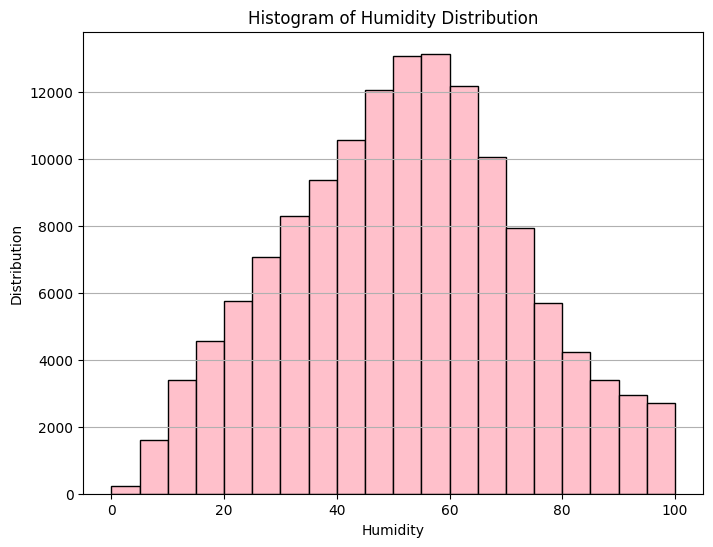

In [29]:
plt.figure(figsize=(8, 6))
plt.hist(df["Humidity"], bins=20, color="pink",edgecolor="black")
plt.xlabel("Humidity")
plt.ylabel("Distribution")
plt.title("Histogram of Humidity Distribution")
plt.grid(axis="y")
plt.show()

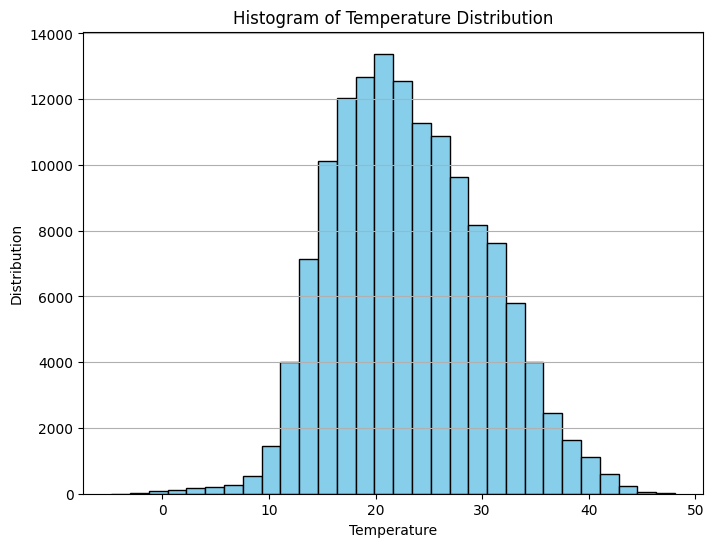

In [30]:
plt.figure(figsize=(8, 6))
plt.hist(df["Temperature"], bins=30,color="skyblue",edgecolor="black")
plt.xlabel("Temperature")
plt.ylabel("Distribution")
plt.title("Histogram of Temperature Distribution")
plt.grid(axis="y")
plt.show()


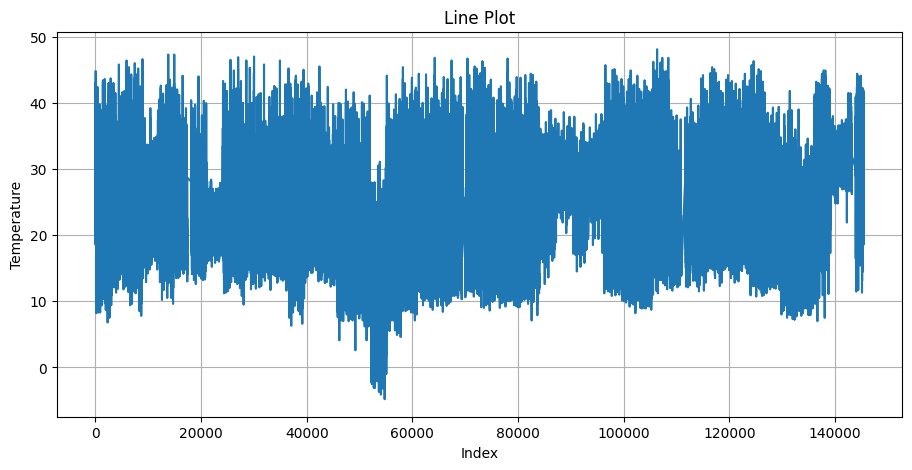

In [31]:
plt.figure(figsize=(24, 5))  # Increase width and height
plt.subplot(122)  # Create subplot for line plot
plt.plot(df["Temperature"])
plt.xlabel("Index")
plt.ylabel("Temperature")
plt.title("Line Plot")
plt.grid(True)

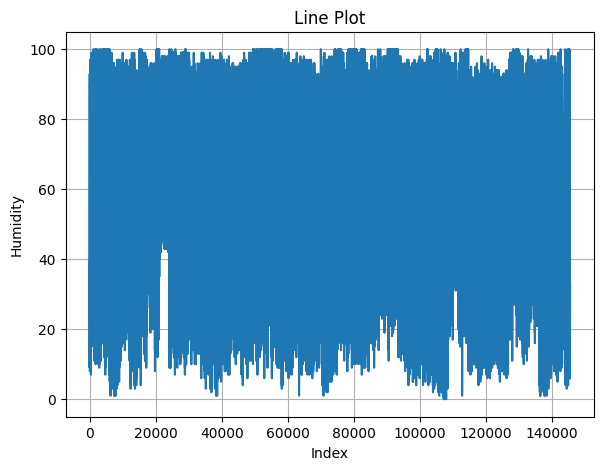

In [32]:
plt.figure(figsize=(15, 5))  # Increase width and height
plt.subplot(122)  # Create subplot for line plot
plt.plot(df["Humidity"])
plt.xlabel("Index")
plt.ylabel("Humidity")
plt.title("Line Plot")
plt.grid(True)

<Axes: xlabel='Temperature', ylabel='Humidity'>

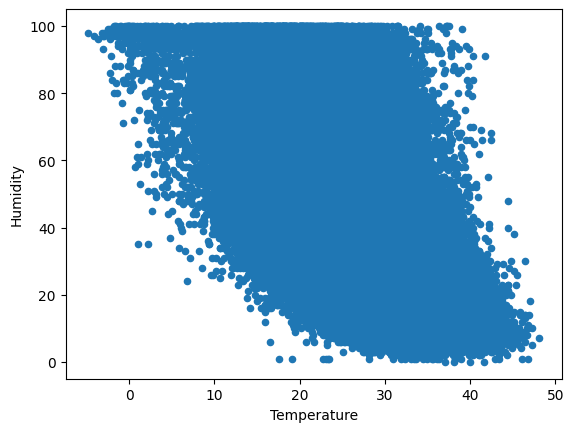

In [33]:

df.plot.scatter(x='Temperature', y='Humidity') 

<Axes: >

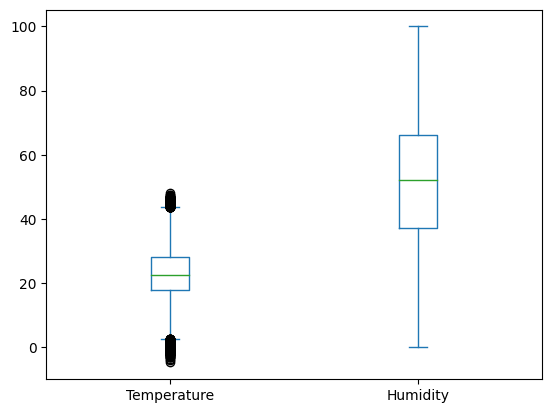

In [34]:


df.plot.box() # Can also pass a by = argument for groupby 

In [35]:

df['RainToday'] = df['RainToday'].map(lambda x: int(1) if x == 'Yes' else int(0))

df.head(20)

,Temperature,Humidity,RainToday
0,22.9,22.0,0
1,25.1,25.0,0
2,25.7,30.0,0
3,28.0,16.0,0
4,32.3,33.0,0
5,29.7,23.0,0
6,25.0,19.0,0
7,26.7,19.0,0
8,31.9,9.0,0
9,30.1,27.0,1


DATA VISUALIZATION AND CLEANING


In [36]:
#first of all let us evaluate the target and find out if our data is imbalanced or not
df['RainToday'].value_counts()

RainToday
0    107456
1     30893
Name: count, dtype: int64

In [37]:
df=df[:70000]
df

,Temperature,Humidity,RainToday
0,22.9,22.0,0
1,25.1,25.0,0
2,25.7,30.0,0
3,28.0,16.0,0
4,32.3,33.0,0
...,...,...,...
73863,17.3,63.0,0
73864,13.4,58.0,0
73865,13.9,51.0,0
73866,18.2,48.0,0


In [38]:
df1 = df[df['RainToday'] == 1]
df0 = df[df['RainToday'] == 0]

print("Number of samples in:")
print("Class label 1 - ", len(df1))
print("Class label 0 - ", len(df0))

# Upsampling 

df1 = df1.sample(20000, replace = True)    # replace = True enables resampling

print('\nAfter resampling - ')

print("Number of samples in:")
print("Class label 1 - ", len(df1))
print("Class label 0 - ", len(df0))

df = pd.concat([df0, df1], axis=0)  # Concatenate along row

Number of samples in:
Class label 1 -  15337
Class label 0 -  54663

After resampling - 
Number of samples in:
Class label 1 -  20000
Class label 0 -  54663


In [39]:
# Splitting into train, val and test set -- 80-10-10 split

# First, an 80-20 split
train_df, val_test_df = train_test_split(df, test_size = 0.2, random_state = 113)

# Then split the 20% into half
val_df, test_df = train_test_split(val_test_df, test_size = 0.5, random_state = 113)

len(train_df), len(val_df), len(test_df)
train_df

,Temperature,Humidity,RainToday
21028,27.4,85.0,0
12455,38.2,16.0,0
64133,19.9,48.0,0
62981,23.1,46.0,0
33944,23.9,50.0,0
...,...,...,...
64050,20.3,77.0,0
52378,2.1,98.0,1
3468,28.0,69.0,0
22418,18.8,66.0,0


In [40]:
ic = df.columns.tolist()
ic.remove('RainToday')

oc = ['RainToday']

ytrain = train_df[oc]
Xtrain = train_df.drop(columns = oc)

yval = val_df[oc]
Xval = val_df.drop(columns = oc)

ytest = test_df[oc]
Xtest = test_df.drop(columns = oc)


Standardization

In [41]:
df.describe()

,Temperature,Humidity,RainToday
count,74663.000000,74663.000000,74663.000000
mean,22.148580,52.935698,0.267870
std,6.854824,20.899076,0.442853
min,-4.800000,1.000000,0.000000
25%,17.500000,38.000000,0.000000
50%,21.700000,53.000000,0.000000
75%,26.400000,67.000000,1.000000
max,47.300000,100.000000,1.000000


The standard deviation of atrribute values is not the same and can hence cause some attributes to be weighed above others. This can be avoided by standardizing the values.

In [42]:
ss = StandardScaler()

Xtrain = ss.fit_transform(Xtrain)
Xval = ss.transform(Xval)
Xtest = ss.transform(Xtest)
df=np.array(df)
df

array([[22.9, 22. ,  0. ],
       [25.1, 25. ,  0. ],
       [25.7, 30. ,  0. ],
       ...,
       [18.9, 56. ,  1. ],
       [15.9, 57. ,  1. ],
       [23.8, 79. ,  1. ]])

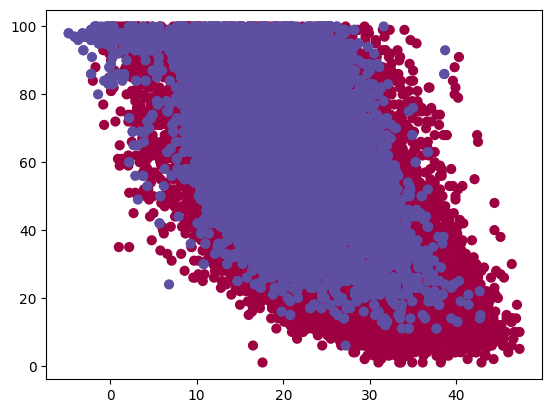

In [43]:
plt.scatter(df[:, 0], df[:, 1], s=40, c=df[:,2], cmap=plt.cm.Spectral)
plt.show()

In [44]:
clf = lo.LogisticRegression()
X=np.array(df[:-1,0:2])
y=np.array(df[:-1,2])
clf.fit(X,y)
y_pred = clf.predict(X)

def accuracy(y_pred,y):
    return np.sum(y_pred==y)/len(y)

acc = accuracy(y_pred,y)
print(acc)

[-0.09703708  0.02024944]
-0.018730420424745355
0.73968015858134


In [45]:
y.shape

(74662,)

In [46]:
from sklearn import metrics
print(metrics.classification_report(y, y_pred))
print(metrics.confusion_matrix(y, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.93      0.84     54663
         1.0       0.54      0.21      0.30     19999

    accuracy                           0.74     74662
   macro avg       0.65      0.57      0.57     74662
weighted avg       0.70      0.74      0.70     74662

[[51086  3577]
 [15859  4140]]
